In [8]:
import pandas as pd

df = pd.read_csv("wine.csv")
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
Y = df['Class']
df.drop("Class", axis=1, inplace=True)

In [10]:
df.isna().sum()

Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of Ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid Phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [11]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
#fit and transform data but maintain dataframe structure
df = pd.DataFrame(SS.fit_transform(df), columns=df.columns)

In [12]:
df

,Alcohol,Malic acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [14]:
from sklearn.cluster import KMeans
results = []
#do k means clustering for 1 to 10 clusters for each run calculate WCSS and append to results
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    results.append(kmeans.inertia_)
results


[2314.0,
 1659.0079672511501,
 1278.7607763668145,
 1175.7051928197118,
 1113.0208821682088,
 1044.0780493140437,
 999.5493686263303,
 951.4917384013688,
 889.5309779249254,
 851.8813851482951]

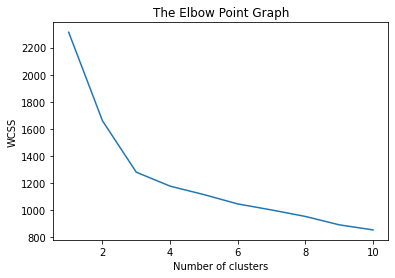

In [16]:
#plot the elbow curve
from matplotlib import pyplot as plt
plt.plot(range(1, 11), results)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### We can see that 3 is the optimal number of clusters for this data set. i.e thats the elbow point

In [17]:
KM = KMeans(n_clusters=3,random_state=0)
y = KM.fit_predict(df)
y


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [22]:
df.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid Phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [28]:
df['Result'] = y

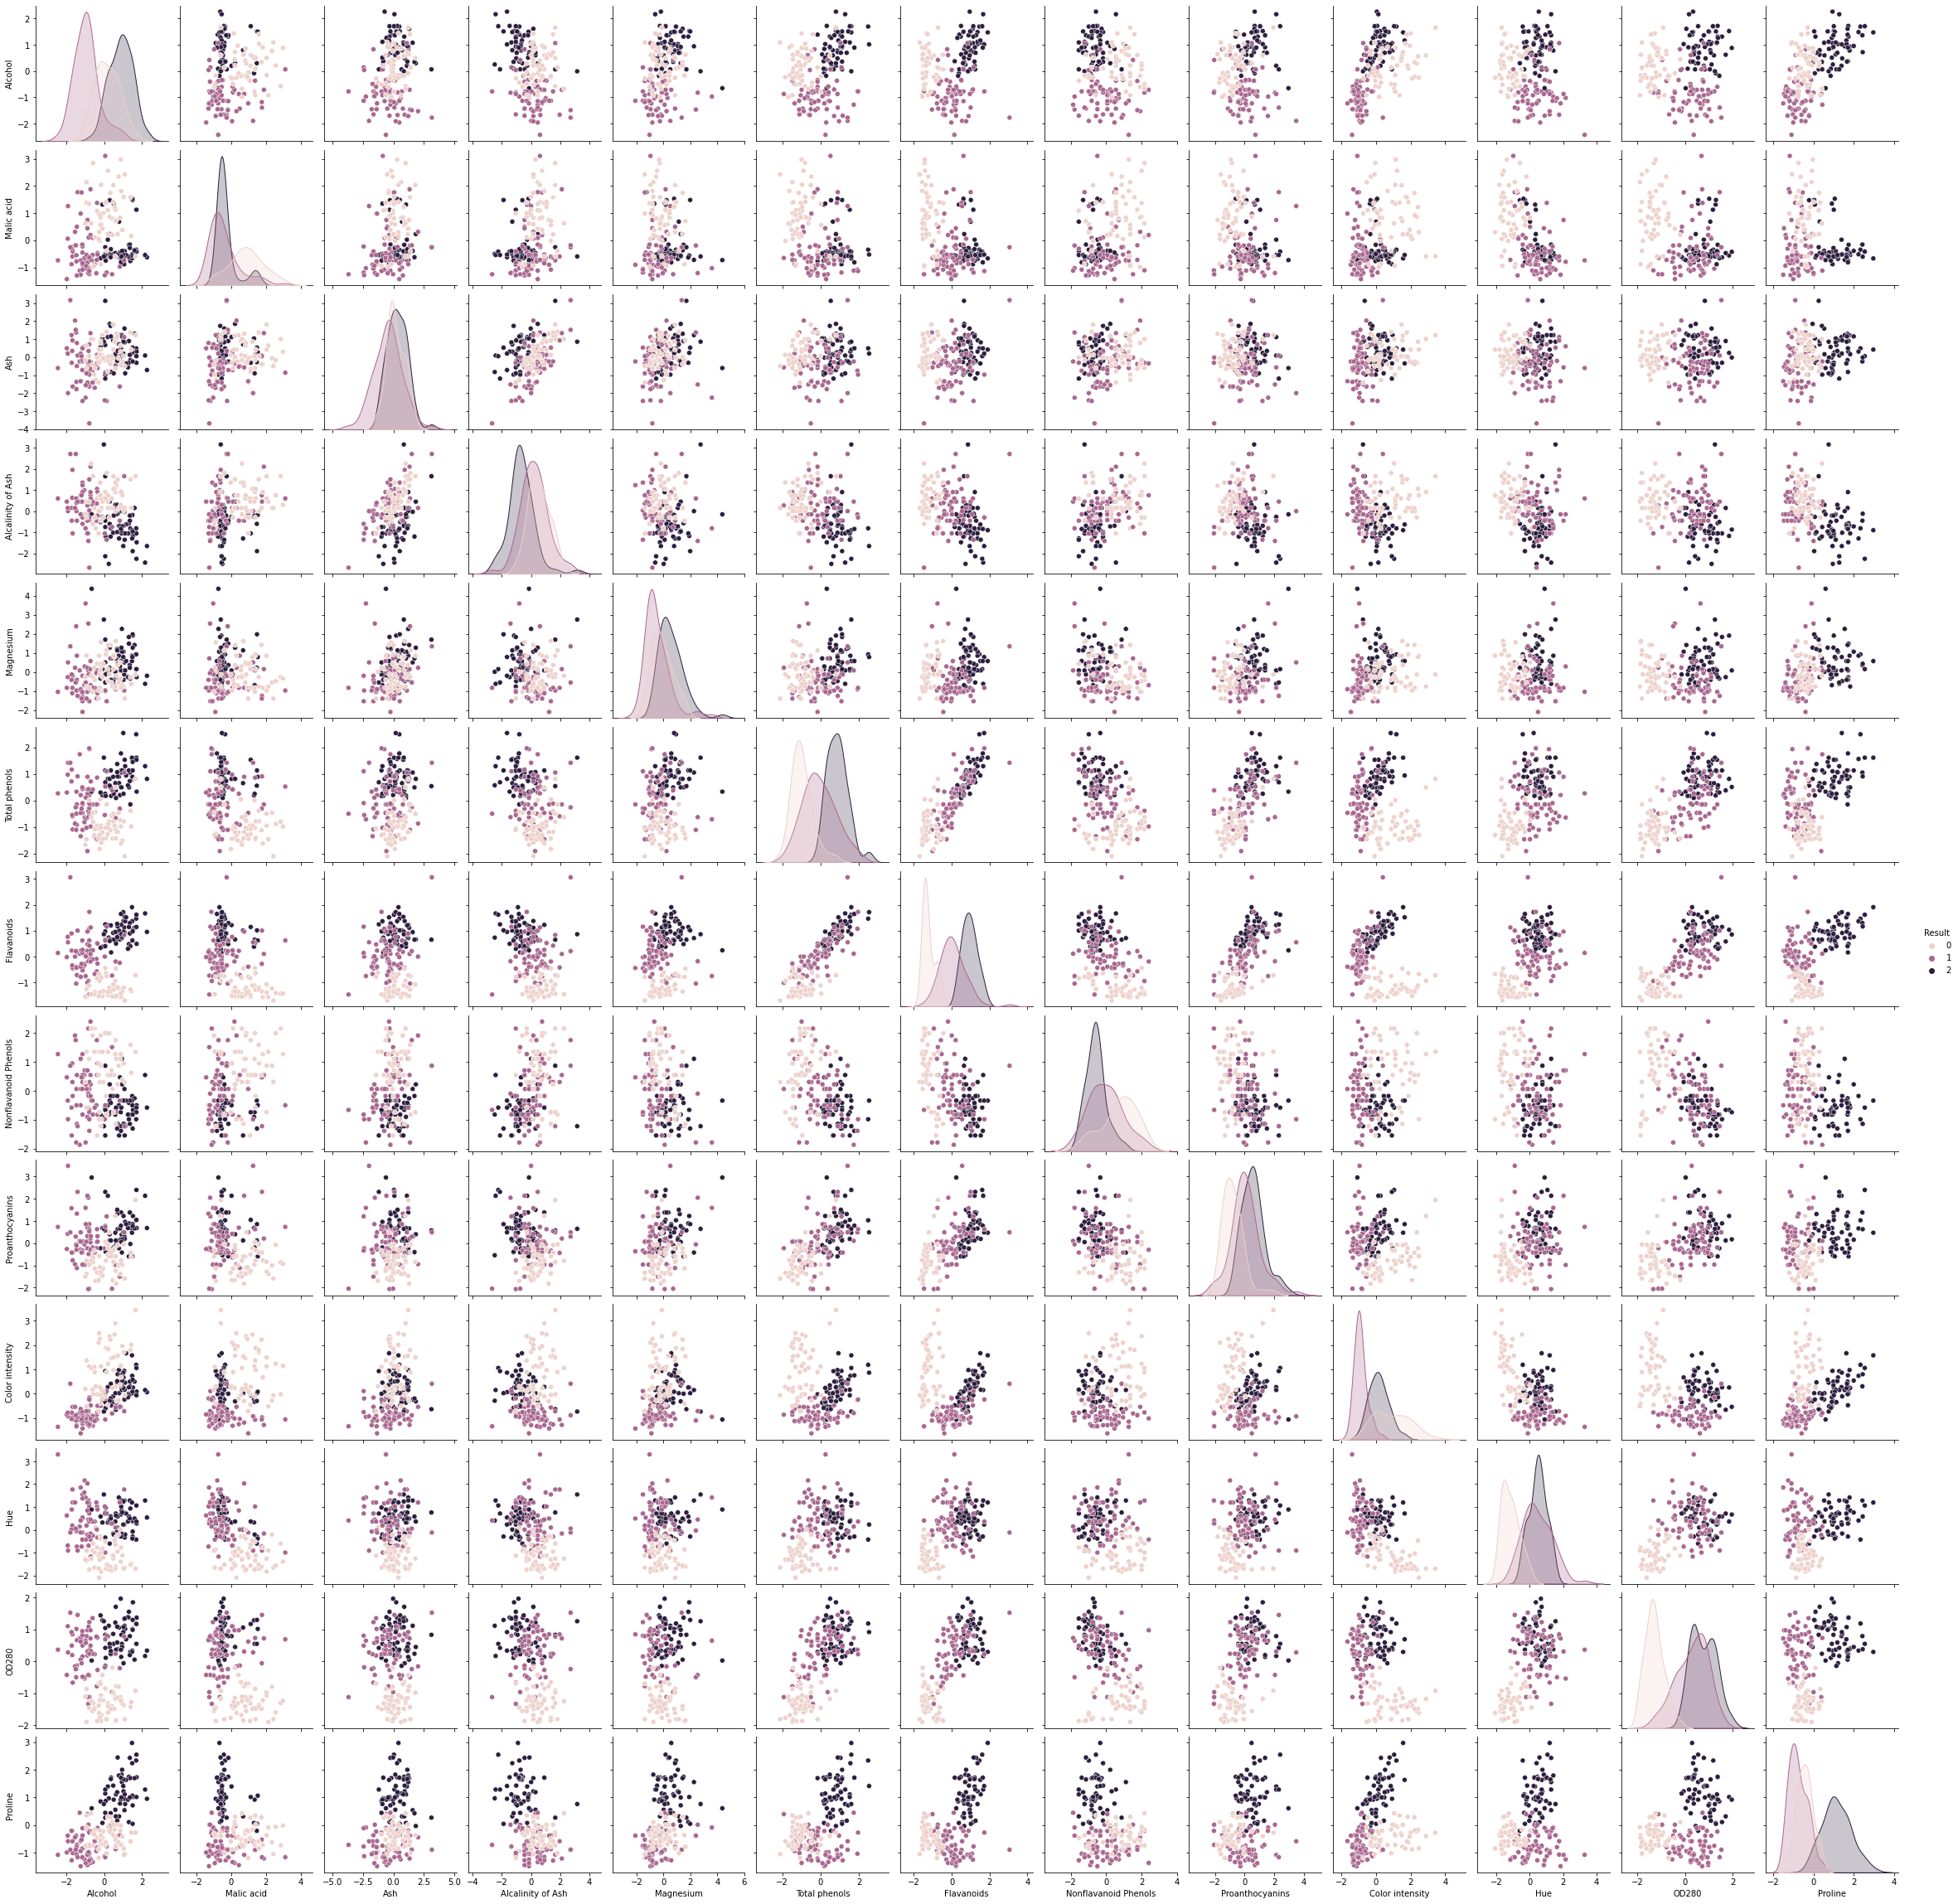

In [29]:
#plot the clusters and centroids on a 2D graph 
import seaborn as sns
#make scatter on all combinations of features
sns.pairplot(df,hue='Result')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


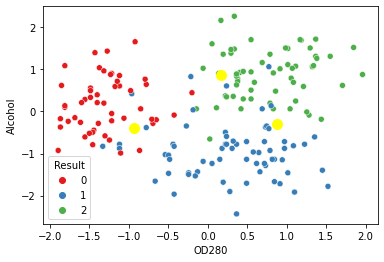

In [34]:
#plot the clusters and centroids on a 2D graph
import seaborn as sns

sns.scatterplot(df['OD280'], df['Alcohol'], hue=df['Result'], palette='Set1')

# add centroids to the plot
plt.scatter(KM.cluster_centers_[:, 0], KM.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')